# Weekend Assignment

Reynat A. Daganta  
Ron Patrick G. Ramas

## Import Required Libraries

In [184]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import kaleido
from IPython.display import Image

## 1. Horizontal Stacked Bar Plot

In [174]:
df = pd.read_csv('data/bar_assignment.csv')
df.head()

,LABEL,COUNT
0,D,1
1,D,1
2,D,0
3,D,1
4,F,1


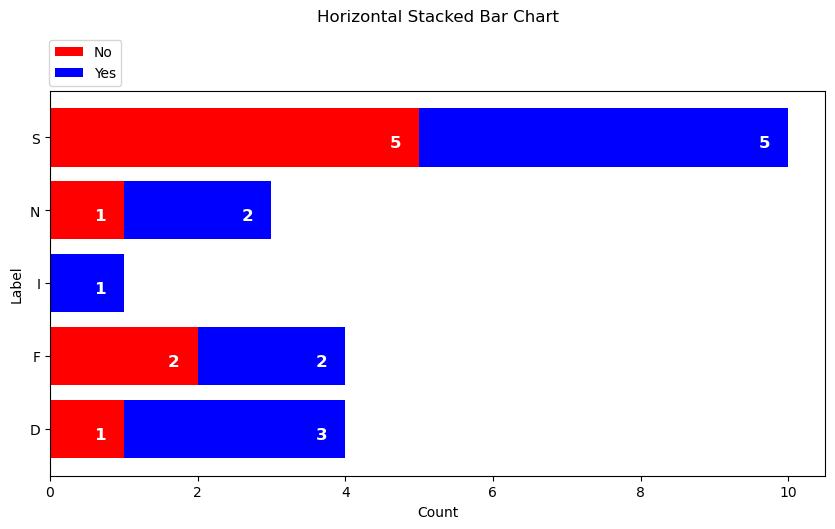

In [217]:
count = df.groupby('LABEL')['COUNT'].value_counts().unstack(fill_value=0)

labels = count.index
zeroes = count[0]
ones = count[1]

y_pos = np.arange(len(labels))

fig, ab = plt.subplots(figsize=(10, 5))

bars1 = ab.barh(y_pos, zeroes, color='red', label='No')
bars2 = ab.barh(y_pos, ones, left=zeroes, color='blue', label='Yes')

for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() - 0.4, bar.get_y() + bar.get_height() / 3, bar.get_width(), color='white', fontweight='bold', fontsize=12)

ab.set_yticks(y_pos)
ab.set_yticklabels(labels)
ab.set_xlabel("Count")
ab.set_ylabel("Label")
ab.set_title("Horizontal Stacked Bar Chart", pad=50, fontsize=12)
ab.legend(loc='upper left', bbox_to_anchor=(-0.01, 1.15))

# Save Image
plt.savefig("./assets/bar_graph.png", dpi=300, bbox_inches='tight')

plt.show()

## 2. Sankey Plot

In [179]:
sankey_df = pd.read_csv('data/sankey_assignment.csv')
sankey_df.head()

,LABEL,PS,OMP,CNP,NRP,NMCCC,PEC,NCDM,RGS,Reg,Aca,Oth
0,S,3,4,1,1,0,0,1,1,2,7,1
1,F,0,1,2,1,1,0,0,1,2,2,0
2,D,1,1,2,0,0,0,1,1,1,3,1
3,N,1,1,1,1,0,1,1,0,2,2,1
4,I,0,1,0,0,0,0,0,0,0,1,0


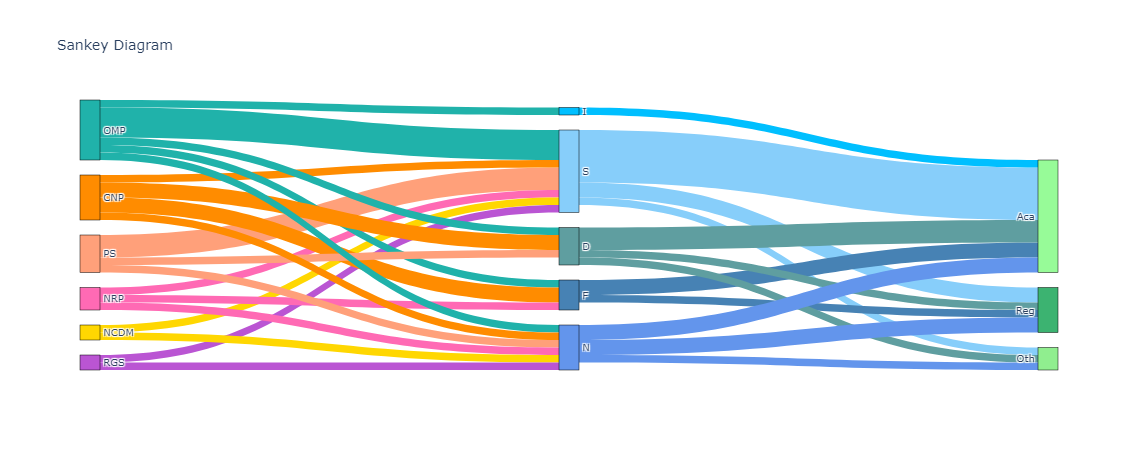

In [213]:
def find_distance_sankey(mid, target):
    global sankey_df
    return sankey_df.loc[sankey_df['LABEL'] == mid, target].values[0]
start = list(sankey_df.columns[1:9])
middle = list(sankey_df['LABEL'].unique())
end = list(sankey_df.columns[9:])

labels = start + middle + end

source = []
target = []
value = []

node_indices = {x: i for i, x in enumerate(labels)}

for s in start:
    for m in middle:
        dist = find_distance_sankey(m, s)
        
        if dist > 0:
            source.append(node_indices[s])
            target.append(node_indices[m])
            value.append(dist)

for e in end:
    for m in middle:
        dist = find_distance_sankey(m, e)
        
        if dist > 0:
            source.append(node_indices[m])
            target.append(node_indices[e])
            value.append(dist)

colors = ['#FFA07A', '#20B2AA', '#FF8C00', '#FF6AB4', '#8FBC8F', 
        '#02CED1', '#FFD701', '#BA55D3', '#87CEFA', '#4782B4',
        '#5F9EA0', '#6395EC', '#00BFFF', '#3CB371', '#97FB98', 
        '#90EE8F' ]

link_colors = [colors[src] for src in source]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.update_layout(title_text="Sankey Diagram", font_size=10)
# fig.show()

Image("./assets/sankey_diagram.png")

# 3. Network Graph 

In [176]:
ng_df = pd.read_csv('data/networks_assignment.csv')
ng_df.head()

,LABELS,N,D,F,I,S,AUT,BEL,BIH,BGR,...,SVK,SVN,ESP,CHE,TUR,UKR,GBR,AUS,HKG,ASU
0,D,3,0,3,1,3,0,0,0,0,...,0,0,1,0,0,0,2,0,0,1
1,F,1,2,0,1,1,0,1,0,0,...,1,1,2,1,0,0,2,0,0,0
2,I,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,0,2,2,1,2,0,0,0,0,...,0,0,1,0,0,0,2,1,0,1
4,S,5,4,3,3,0,2,2,2,2,...,0,0,2,2,2,2,3,1,1,1


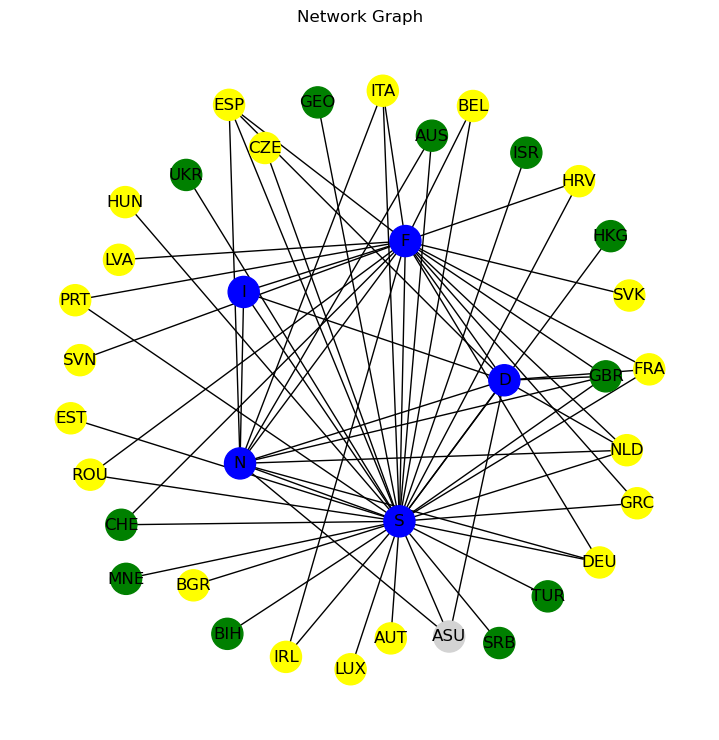

In [192]:
labels = ng_df["LABELS"].tolist()

G = nx.Graph()

all_nodes = set(labels).union(set(ng_df.columns[1:]))
for node in all_nodes:
    G.add_node(node)

for i, label in enumerate(labels):
    for j, col in enumerate(ng_df.columns[1:]):
        if ng_df.iloc[i, j+1] > 0:
            G.add_edge(label, col)

angle = np.linspace(0, 6.24, len(labels), endpoint=False)
pentagon_positions = {
    labels[i]: (np.cos(angle[i]), 
    np.sin(angle[i])) for i in range(len(labels))
}

other_nodes = set(G.nodes()) - set(labels)
spring_positions = nx.spring_layout(G.subgraph(other_nodes), scale=2)

positions = {**spring_positions, **pentagon_positions}

# ASU WAS NOT SPECIFIED TO HAVE A COLOR
blue_nodes = {"D", "F", "I", "N", "S"}
green_nodes = {'BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA'}
yellow_nodes = {'AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP'}

node_colors = []
for node in G.nodes():
    if node in blue_nodes:
        node_colors.append("blue")
    elif node in green_nodes:
        node_colors.append("green")
    elif node in yellow_nodes:
        node_colors.append("yellow")
    else:
        node_colors.append("lightgray")

plt.figure(figsize=(7, 7))
nx.draw(
    G, pos=positions, with_labels=True, node_color=node_colors, node_size=500, font_size=12
)
plt.title("Network Graph")

# Save Image
plt.savefig("./assets/network_graph.png", dpi=300, bbox_inches='tight')

plt.show()

# 4. Collated Graph

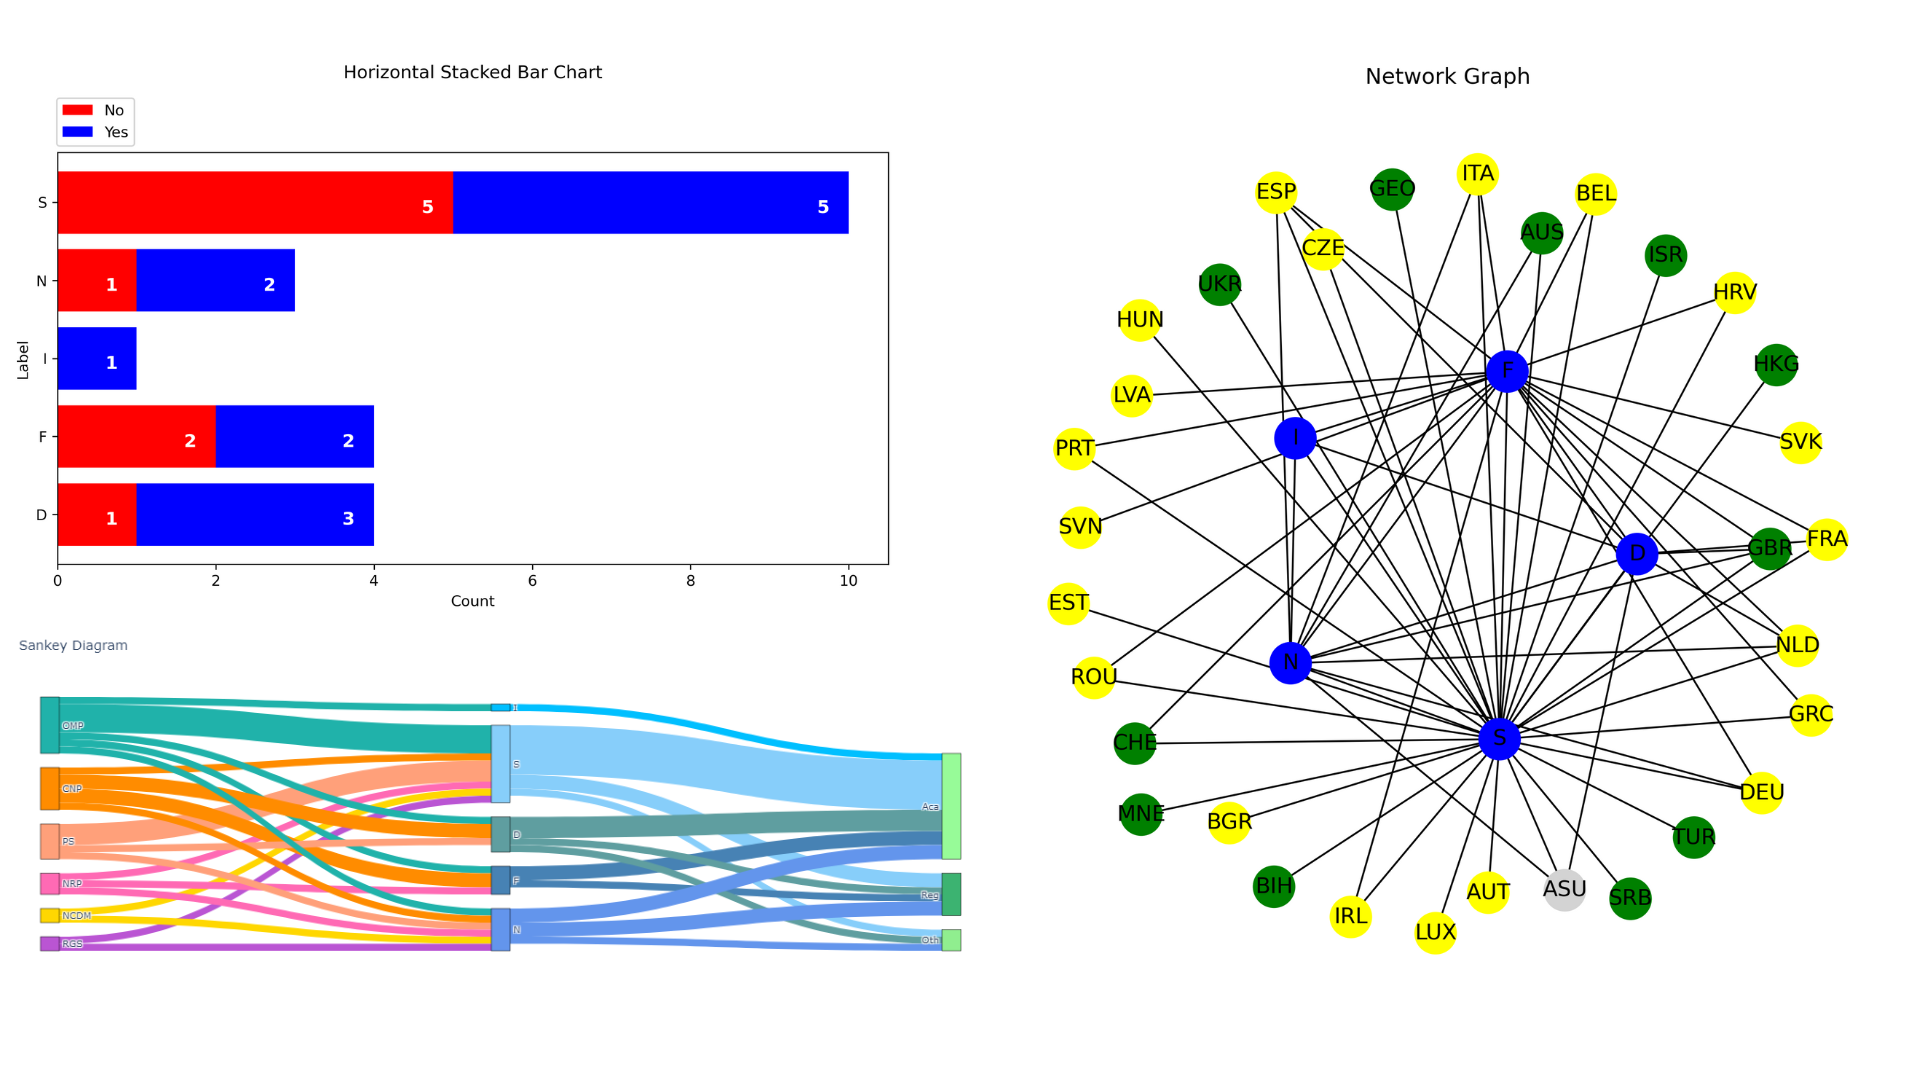

In [220]:
Image("./assets/collated_graph.png")